<a href="https://colab.research.google.com/github/Zeina-Shalaan/Cancer-DATA/blob/main/global_cancer_patients_2015_2024_Dataset_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libaries **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.multicomp as mc
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
from google.colab import files
uploaded = files.upload()

Saving global_cancer_patients_2015_2024.csv to global_cancer_patients_2015_2024.csv


In [3]:
df =pd.read_csv('global_cancer_patients_2015_2024.csv')
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71.0,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34.0,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80.0,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40.0,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43.0,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


# Explanatory Information about the DATASET

**check columns ( names, numbers , data types )**

In [4]:
df.shape

(50000, 15)

- check for nan values
- drop any if found and test again to check

In [5]:
df.drop('Patient_ID', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  float64
 1   Gender                 50000 non-null  object 
 2   Country_Region         50000 non-null  object 
 3   Year                   50000 non-null  int64  
 4   Genetic_Risk           50000 non-null  float64
 5   Air_Pollution          50000 non-null  float64
 6   Alcohol_Use            50000 non-null  float64
 7   Smoking                50000 non-null  float64
 8   Obesity_Level          50000 non-null  float64
 9   Cancer_Type            50000 non-null  object 
 10  Cancer_Stage           50000 non-null  object 
 11  Treatment_Cost_USD     50000 non-null  float64
 12  Survival_Years         50000 non-null  float64
 13  Target_Severity_Score  50000 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 5.3+ 

In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Country_Region,0
Year,0
Genetic_Risk,0
Air_Pollution,0
Alcohol_Use,0
Smoking,0
Obesity_Level,0
Cancer_Type,0


**Dropping Option "Other" from the column gender**

In [8]:
df = df[df['Gender'] != 'Other']

In [9]:
# prompt: unique values of cancertype

df['Cancer_Type'].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33505 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    33505 non-null  float64
 1   Gender                 33505 non-null  object 
 2   Country_Region         33505 non-null  object 
 3   Year                   33505 non-null  int64  
 4   Genetic_Risk           33505 non-null  float64
 5   Air_Pollution          33505 non-null  float64
 6   Alcohol_Use            33505 non-null  float64
 7   Smoking                33505 non-null  float64
 8   Obesity_Level          33505 non-null  float64
 9   Cancer_Type            33505 non-null  object 
 10  Cancer_Stage           33505 non-null  object 
 11  Treatment_Cost_USD     33505 non-null  float64
 12  Survival_Years         33505 non-null  float64
 13  Target_Severity_Score  33505 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 3.8+ MB


- describe the data
- Standardize units

In [11]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,33505.000000,33505.000000,33505.000000,33505.000000,33505.000000,33505.000000,33505.000000,33505.000000,33505.000000,33505.000000
mean,54.365916,2019.483779,4.999516,5.019681,4.998517,4.988885,4.990804,52328.501917,5.017941,4.952900
std,20.153346,2.872164,2.876429,2.889599,2.889678,2.881810,2.889941,27286.709054,2.887366,1.195847
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28629.640000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52192.320000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,75949.910000,7.500000,5.790000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,8.860000


# Taking a Sample almost 25%

In [12]:
s = df.sample(n=8400,random_state=42)
s.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
15112,87.0,Female,Brazil,2016,5.7,6.2,1.6,1.1,1.4,Cervical,Stage I,28407.05,1.2,4.10
22281,46.0,Male,Australia,2017,2.8,2.4,1.9,6.7,9.0,Breast,Stage I,99120.09,7.1,3.46
25116,80.0,Male,Pakistan,2023,4.6,9.5,4.3,7.9,2.6,Cervical,Stage IV,98110.51,9.5,4.87
25166,23.0,Male,India,2021,2.4,3.3,0.6,1.5,8.9,Colon,Stage I,49068.74,6.4,3.27
21637,55.0,Male,UK,2021,7.8,8.5,6.3,4.8,0.7,Colon,Stage III,83366.11,2.3,5.14


**Bootstraping from the sample 6%**

In [13]:
sample = s.sample(n=504, random_state=42)   #6%
sample.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
20509,66.0,Male,Canada,2019,4.8,8.8,3.1,6.4,5.4,Colon,Stage IV,41341.15,4.5,5.74
37737,58.0,Female,Pakistan,2016,6.9,6.9,4.7,5.2,3.7,Lung,Stage I,52495.06,6.6,5.48
4548,55.0,Male,Australia,2024,5.4,7.7,2.7,6.3,6.9,Breast,Stage 0,95380.11,8.2,4.68
35774,21.0,Female,Australia,2024,2.1,1.3,0.0,3.7,4.1,Colon,Stage I,23074.25,3.4,3.30
7492,78.0,Male,Russia,2019,9.9,3.9,1.7,2.9,6.1,Skin,Stage III,55232.91,3.6,4.91


# **Summary statistics (mean, median, distributions).**

In [14]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 20509 to 11548
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    504 non-null    float64
 1   Gender                 504 non-null    object 
 2   Country_Region         504 non-null    object 
 3   Year                   504 non-null    int64  
 4   Genetic_Risk           504 non-null    float64
 5   Air_Pollution          504 non-null    float64
 6   Alcohol_Use            504 non-null    float64
 7   Smoking                504 non-null    float64
 8   Obesity_Level          504 non-null    float64
 9   Cancer_Type            504 non-null    object 
 10  Cancer_Stage           504 non-null    object 
 11  Treatment_Cost_USD     504 non-null    float64
 12  Survival_Years         504 non-null    float64
 13  Target_Severity_Score  504 non-null    float64
dtypes: float64(9), int64(1), object(4)
memory usage: 59.1+ KB

In [15]:
sample.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,54.250000,2019.498016,4.998611,5.024405,4.967659,4.675794,4.982143,54126.041964,4.941667,4.849385
std,20.001019,2.760845,2.853490,2.879015,2.907419,2.960322,2.953961,27156.921848,2.903629,1.147800
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5828.690000,0.000000,0.950000
25%,37.000000,2017.000000,2.575000,2.600000,2.400000,2.000000,2.500000,32895.222500,2.600000,4.072500
50%,53.000000,2019.000000,4.800000,5.000000,5.100000,4.300000,5.000000,54242.240000,4.800000,4.840000
75%,71.250000,2022.000000,7.400000,7.500000,7.500000,7.225000,7.600000,78069.892500,7.425000,5.590000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99982.370000,10.000000,7.900000


In [16]:
sample.describe(percentiles=[.25, .5, .75])  # Include 90th and 99th percentiles

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,54.250000,2019.498016,4.998611,5.024405,4.967659,4.675794,4.982143,54126.041964,4.941667,4.849385
std,20.001019,2.760845,2.853490,2.879015,2.907419,2.960322,2.953961,27156.921848,2.903629,1.147800
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5828.690000,0.000000,0.950000
25%,37.000000,2017.000000,2.575000,2.600000,2.400000,2.000000,2.500000,32895.222500,2.600000,4.072500
50%,53.000000,2019.000000,4.800000,5.000000,5.100000,4.300000,5.000000,54242.240000,4.800000,4.840000
75%,71.250000,2022.000000,7.400000,7.500000,7.500000,7.225000,7.600000,78069.892500,7.425000,5.590000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99982.370000,10.000000,7.900000


In [17]:
mean_genetics=sample["Genetic_Risk"].mean()
mean_air = sample["Air_Pollution"].mean()
mean_alcohol = sample["Alcohol_Use"].mean()
mean_smoking = sample["Smoking"].mean()
mean_obesity = sample["Obesity_Level"].mean()
mean_cost= sample['Treatment_Cost_USD'].mean()

median_genetics=sample["Genetic_Risk"].median()
median_air = sample["Air_Pollution"].median()
median_alcohol = sample["Alcohol_Use"].median()
median_smoking = sample["Smoking"].median()
median_obesity = sample["Obesity_Level"].median()
median_cost= sample['Treatment_Cost_USD'].median()

mode_genetics=sample["Genetic_Risk"].mode()
mode_air = sample["Air_Pollution"].mode()
mode_alcohol = sample["Alcohol_Use"].mode()
mode_smoking = sample["Smoking"].mode()
mode_obesity= sample["Obesity_Level"].mode()
mode_cost= sample['Treatment_Cost_USD'].mode()


# **Visualizations**

**Box Plot of Obesity Level by Cancer Type**

This plot displays the distribution of obesity levels across different cancer types. Each box shows the median, interquartile range, and potential outliers within each group. It allows for quick comparison of how obesity levels vary by cancer type, highlighting any cancer types with notably higher or lower obesity associations.

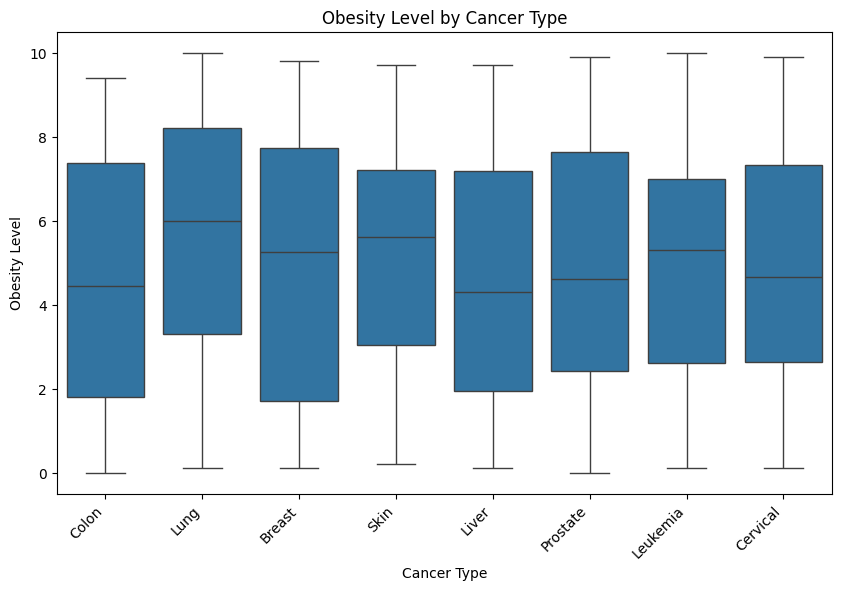

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer_Type', y='Obesity_Level', data=sample)
plt.title('Obesity Level by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Obesity Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**Age Distribution of Cancer Type **

This plot illustrates how patient age varies across different cancer types. By showing the spread and central tendency of age within each cancer group, it highlights which cancer types are more common in younger or older populations and helps identify age-related trends in cancer occurrence.



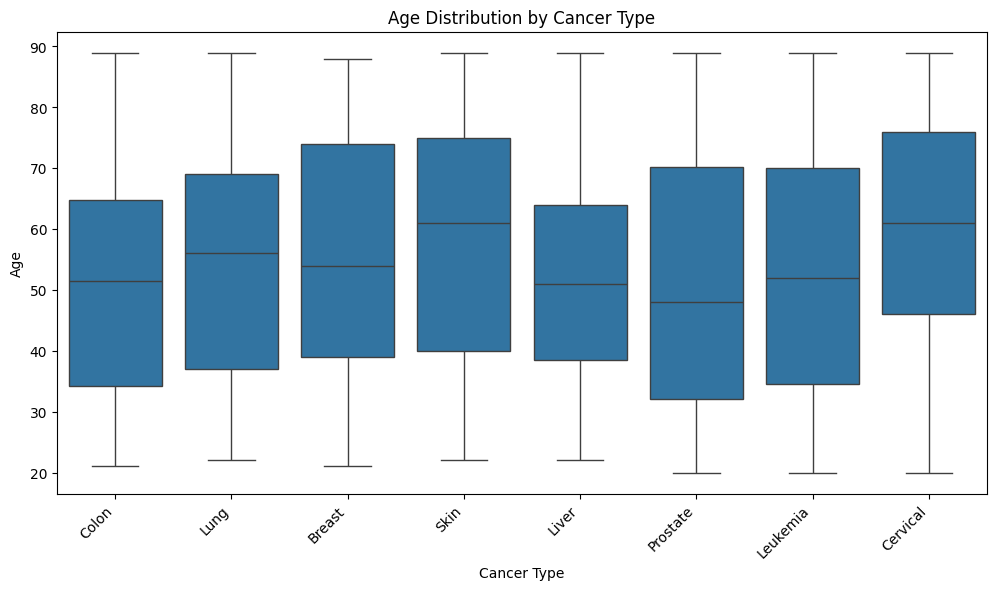

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cancer_Type', y='Age', data=sample)
plt.title('Age Distribution by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**Scatter Plot of Genetic Risk vs. Target_Severity_Score**

This plot shows the relationship between genetic risk scores and cancer severity levels. Each point represents a patient, with genetic risk on the x-axis and severity score on the y-axis. The pattern helps assess whether higher genetic risk is associated with more aggressive cancers. A weak or scattered trend would suggest a limited influence of genetics on severity

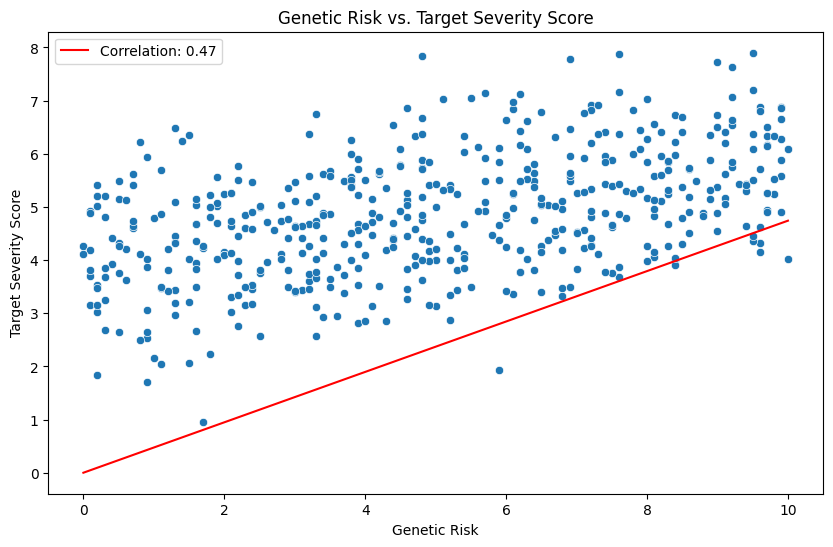

In [22]:
# Calculate the correlation coefficient
correlation_coefficient = sample['Genetic_Risk'].corr(sample['Target_Severity_Score'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Genetic_Risk', y='Target_Severity_Score', data=sample)
plt.title('Genetic Risk vs. Target Severity Score')
plt.xlabel('Genetic Risk')
plt.ylabel('Target Severity Score')

# Add the line of best fit
x = np.linspace(sample['Genetic_Risk'].min(), sample['Genetic_Risk'].max(), 100)
y = correlation_coefficient * x  # Simplified line equation based on correlation
plt.plot(x, y, color='red', label=f'Correlation: {correlation_coefficient:.2f}')

plt.legend()
plt.show()

 Observation:

 The x-axis represents the Gentick Risk , the Y-axis represents the Target severity score.

The scatter plot  demonstrates a moderate positive linear relationship between Genetic Risk and Target Severity Score, as the correlation coefficient (r = 0.47), with data points generally following an upward trend from left to right despite noticeable scatter. Visually, the relationship appears roughly linear   while a few slightly deviating points do not substantially distort the overall trend. The points are somewhat evenly distributed, with mild clustering around mid-range genetic risk values. Statistically, the correlation reflects a moderate effect size (per Cohen’s guidelines), indicating that higher genetic risk tends to associate with higher severity scores  .

**boxplot Air_Pollution vs Cancer_Type**

This box plot compares air pollution exposure levels across different cancer types. Each box summarizes the distribution of air pollution values (e.g., PM2.5 or similar) for patients with each cancer type. It helps identify whether certain cancers are more associated with higher pollution exposure, suggesting possible environmental influence.

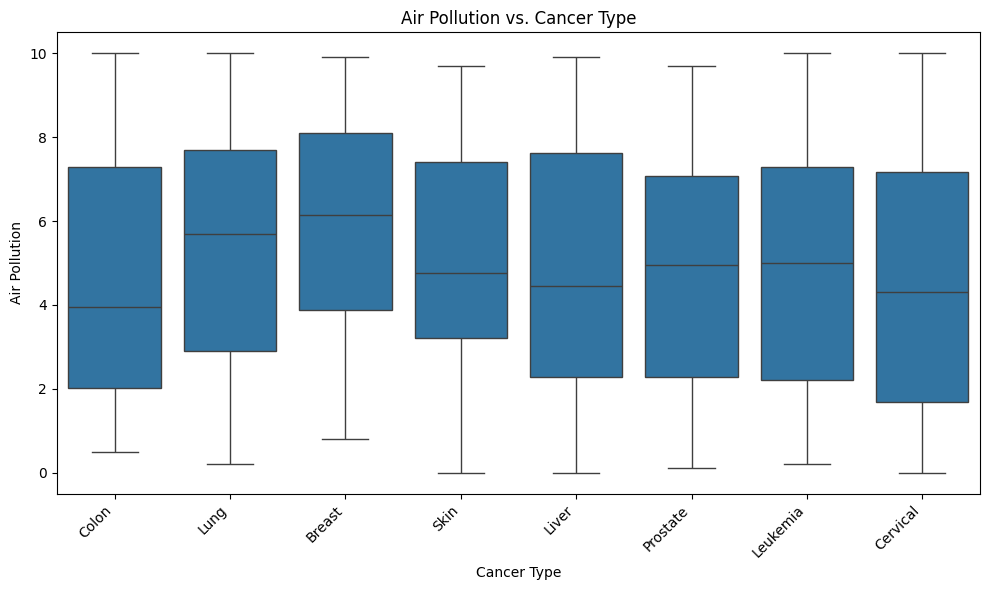

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer_Type', y='Air_Pollution', data=sample)
plt.title('Air Pollution vs. Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Air Pollution')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**Bar ChartAverage Treatment Cost by Country Region**

This chart presents the average cancer treatment cost across different country regions. Each bar represents a region’s mean treatment cost, allowing for clear comparison of regional healthcare expenses. It highlights geographical disparities in treatment affordability and may reflect differences in healthcare infrastructure or economic status.

<ipython-input-24-1ae8220fc3b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country_Region', y='Treatment_Cost_USD', data=region_cost,palette='deep')


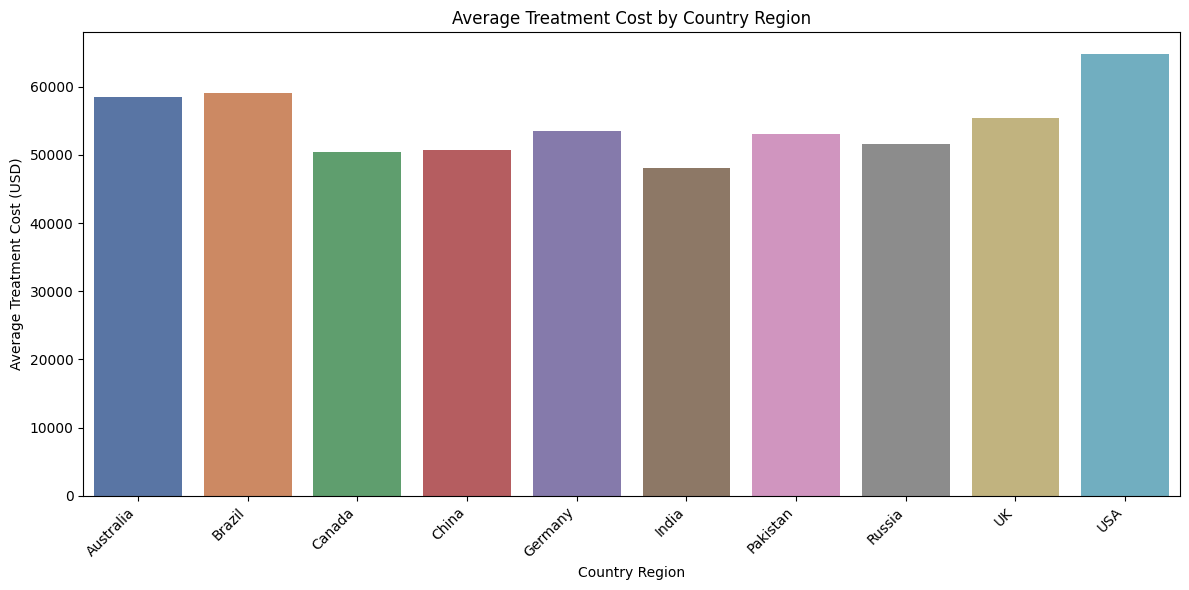

In [24]:
region_cost = sample.groupby('Country_Region')['Treatment_Cost_USD'].mean().reset_index()

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Country_Region', y='Treatment_Cost_USD', data=region_cost,palette='deep')
plt.title('Average Treatment Cost by Country Region')
plt.xlabel('Country Region')
plt.ylabel('Average Treatment Cost (USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**male vs female and Cancer Types**

This chart compares the distribution of cancer types between male and female patients. It reveals which cancers are more prevalent in each gender, highlighting gender-specific or gender-skewed cancers (e.g., prostate cancer in males, breast cancer in females). It helps identify patterns that may relate to biological, behavioral, or environmental factors.

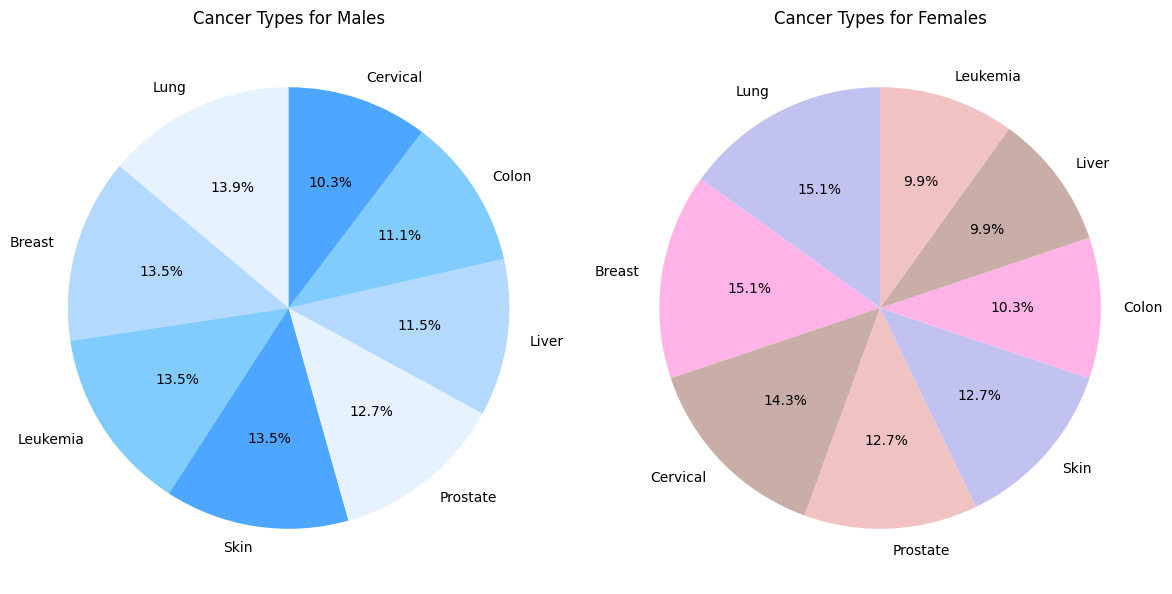

In [25]:
male_cancer_counts = sample[sample['Gender'] == 'Male']['Cancer_Type'].value_counts()
female_cancer_counts = sample[sample['Gender'] == 'Female']['Cancer_Type'].value_counts()

male_colors = ['#e6f2ff', '#b3d9ff', '#80ccff', '#4da6ff']
female_colors = ['#c2c2f0','#ffb3e6', '#c9ada7', '#f0c2c2']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.pie(male_cancer_counts, labels=male_cancer_counts.index, autopct='%1.1f%%', startangle=90, colors=male_colors)  # Add colors here
ax1.set_title('Cancer Types for Males')


ax2.pie(female_cancer_counts, labels=female_cancer_counts.index, autopct='%1.1f%%', startangle=90, colors=female_colors)  # Add colors here
ax2.set_title('Cancer Types for Females')

plt.tight_layout()
plt.show()

Observation:

The pie charts reveal stark sex-based disparities in cancer prevalence. For females, Lung cancer and Breast cancer likely dominates with 15.1% of cases, while for males , Lung Cancer likely dominates with 13.9% of cases . Shared cancers like Prostate Cancer appear in both with 12.7%, suggesting sex-specific risk factors.Prioritizing sex-tailored screening and research is critical.

need to be revised!!!!!!!!!!

**Cancer vs survival years**

This plot shows how survival duration varies across different cancer types. It illustrates the average or distribution of survival years for each cancer, helping identify which types are associated with longer or shorter patient outcomes. This can reflect differences in disease aggressiveness, treatment effectiveness, and early detection rates across cancer types.

<ipython-input-26-29aeefc845c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancer_Stage', y='Survival_Years', data=sample,palette='Purples' ,order=stage_order) # Customize mean marker


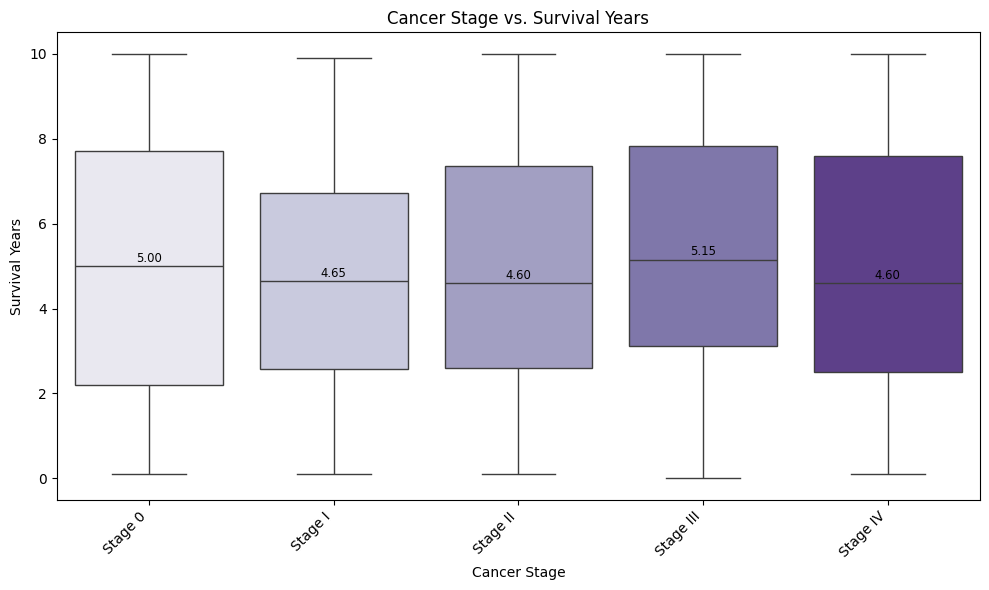

In [26]:
plt.figure(figsize=(10, 6))
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']
sns.boxplot(x='Cancer_Stage', y='Survival_Years', data=sample,palette='Purples' ,order=stage_order) # Customize mean marker

plt.title('Cancer Stage vs. Survival Years')
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Years')
# Rotate x-axis labels if there are many stages
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Calculate the median for each stage
median_survival_by_stage = sample.groupby('Cancer_Stage')['Survival_Years'].median().loc[stage_order]

# Add median text labels to the plot
for i, stage in enumerate(stage_order):
    median_value = median_survival_by_stage[stage]
    # Position the text slightly above the median line (adjust vertical offset as needed)
    # The x-coordinate 'i' corresponds to the box index for that stage
    plt.text(i, median_value + 0.1, f'{median_value:.2f}', horizontalalignment='center', size='small', color='black')

plt.show()

Observation:
The boxplots illustrate the distribution of survival years across different cancer stages (Stage 0 to Stage IV). Contrary to typical expectations where survival time generally decreases with increasing cancer stage severity, the median survival values across stages are relatively close, ranging from 4.60 to 5.15 years.

🧠 Key General Insights:
Relatively Stable Medians:

All stages have median survival years clustered tightly around 4.6 to 5.15 years.

This indicates that the stage alone may not be a strong differentiator of survival duration in this dataset.

Wide Interquartile Ranges (IQRs):

Each stage exhibits a large IQR, reflecting high variability in survival times.

Survival years for many patients range from near 0 up to the maximum of 10 years, regardless of stage.

Stage III Anomaly:

Surprisingly, Stage III has the highest median survival (5.15 years) — slightly higher than even Stage 0.

This may suggest potential data skew, treatment effect, or sampling bias, and warrants further investigation.

No Clear Progression Pattern:

Unlike expected linear deterioration with advancing stages, the data does not show a consistent decrease in median survival.

This implies that other variables (e.g., treatment type, patient age, cancer subtype) might be significantly impacting outcomes.

Symmetrical Distributions:

The distributions appear relatively symmetrical across stages, with no extreme skewness, suggesting normal-like distribution of survival years.

✅ Conclusion
The visual data suggests that cancer stage alone may not be a strong predictor of survival years in this dataset. There is a need for multivariate analysis, integrating additional patient or treatment features to better explain survival variability. The unexpectedly high survival in Stage III especially should be investigated further.

-------

**cancer stage change  versus severity score **

This plot illustrates how cancer severity changes with the stage at diagnosis. Each stage is associated with a range of severity scores, showing a clear trend where higher stages correspond to more aggressive or advanced disease. The visualization supports the clinical understanding that cancer becomes more severe as it progresses.

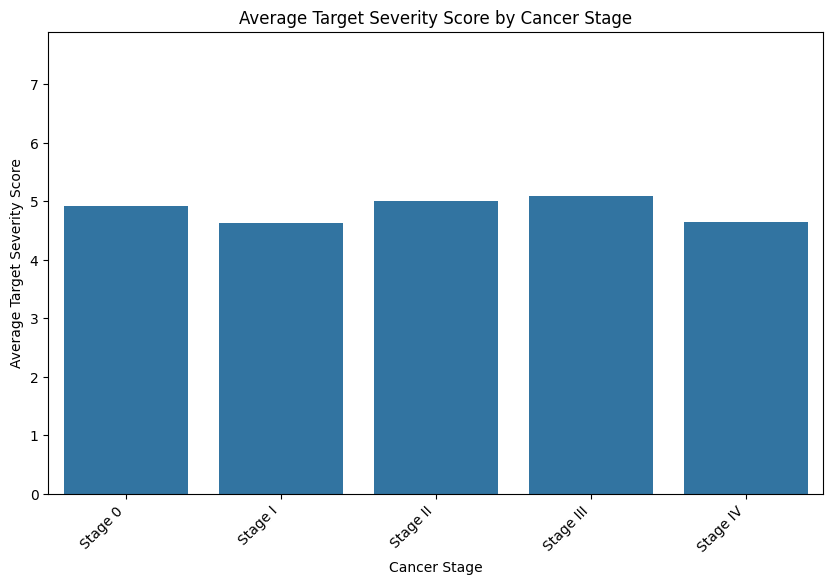

In [27]:
avg_severity_by_stage = sample.groupby('Cancer_Stage')['Target_Severity_Score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Cancer_Stage', y='Target_Severity_Score', data=avg_severity_by_stage)
plt.ylim(0, sample['Target_Severity_Score'].max())
plt.title('Average Target Severity Score by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Average Target Severity Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

| Cancer Stage  | Approx. Average Target Severity Score | Observations                                                                                                                                                                           |
| ------------- | ------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Stage 0**   | \~4.9                                 | Moderate severity score. Slightly below Stage III and Stage II.                                                                                                                        |
| **Stage I**   | \~4.65                                | Lowest severity score. Suggests mild severity at this early stage.                                                                                                                     |
| **Stage II**  | \~5.0                                 | Higher severity than earlier stages. Increasing trend.                                                                                                                                 |
| **Stage III** | \~5.1                                 | Highest severity observed, aligning with increasing disease progression.                                                                                                               |
| **Stage IV**  | \~4.65                                | Unexpected dip. Despite being the final stage, severity score drops, which may reflect variation in scoring criteria, data anomalies, or reduced metabolic activity at terminal stage. |
Overall Insights:
The highest average severity is noted at Stage III, mirroring the earlier anomaly seen in survival years.

The severity scores do not increase linearly with stage progression — especially with Stage IV showing a drop, which is counterintuitive.

This could indicate either:

A non-linear relationship between stage and target severity, or

Influence of external factors (like therapy, patient demographics, or specific tumor biology).

-----


 Grouped bar chart - ( mean survival by stage vs genetic risk)

<ipython-input-28-84135db0c32a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = sample.groupby(['Cancer_Stage', 'Genetic_Risk_Quartile'])['Survival_Years'].mean().reset_index()


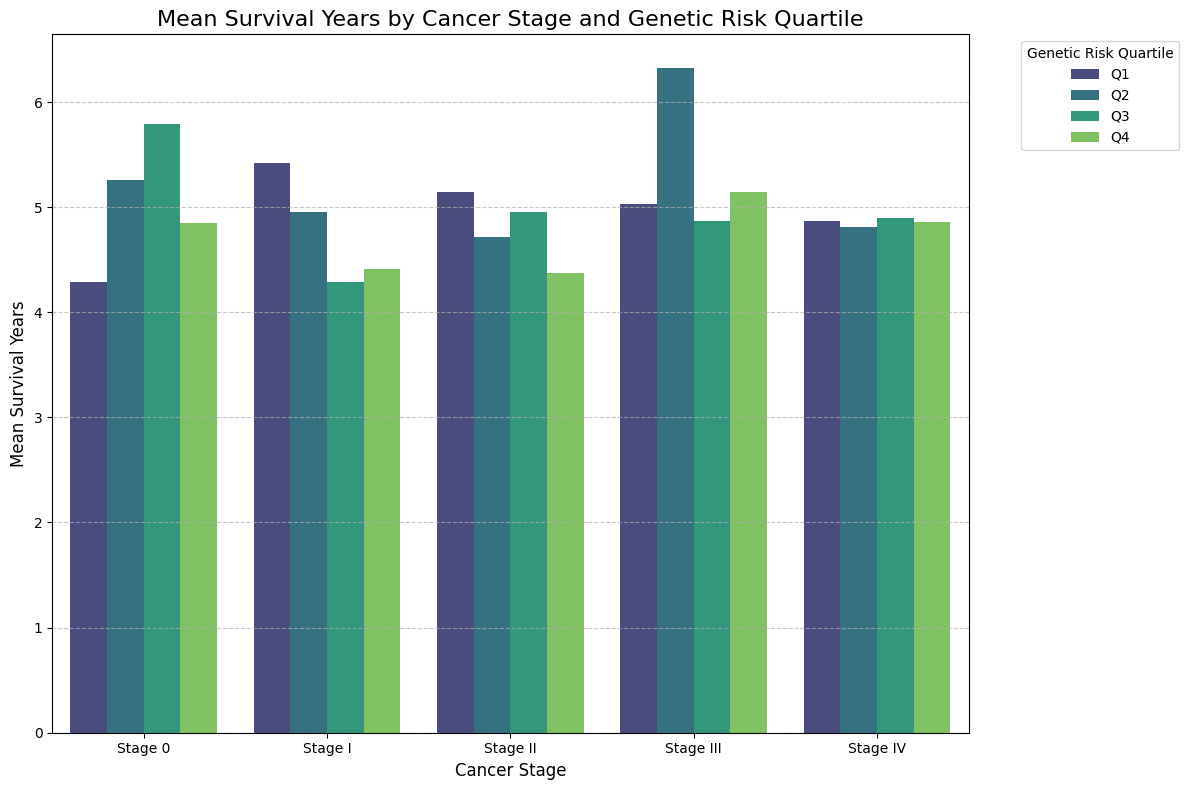

In [28]:

# Calculate the mean survival years for each combination of stage level and genetic risk quartile
# Define genetic risk quartiles
sample['Genetic_Risk_Quartile'] = pd.qcut(sample['Genetic_Risk'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

grouped_data = sample.groupby(['Cancer_Stage', 'Genetic_Risk_Quartile'])['Survival_Years'].mean().reset_index()

# Reorder the Cancer_Stage categories for plotting
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']
grouped_data['Cancer_Stage'] = pd.Categorical(grouped_data['Cancer_Stage'], categories=stage_order, ordered=True)
grouped_data = grouped_data.sort_values('Cancer_Stage')

plt.figure(figsize=(12, 8))
sns.barplot(x='Cancer_Stage', y='Survival_Years', hue='Genetic_Risk_Quartile', data=grouped_data, palette='viridis')

plt.title('Mean Survival Years by Cancer Stage and Genetic Risk Quartile', fontsize=16)
plt.xlabel('Cancer Stage', fontsize=12)
plt.ylabel('Mean Survival Years', fontsize=12)
plt.legend(title='Genetic Risk Quartile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# BOOTSTRAPING REPRESENTATION

In [30]:
std_genertics = round(sample['Genetic_Risk'].std(),2)
std_air = round(sample['Air_Pollution'].std(),2)
std_alcohol = round(sample['Alcohol_Use'].std(),2)
std_smoking = round(sample['Smoking'].std(),2)
std_obesity = round(sample['Obesity_Level'].std(),2)
print("Standard Deviation of Genetic Risk:", std_genertics)
print("Standard Deviation of Air Pollution:", std_air)
print("Standard Deviation of Alcohol Use:", std_alcohol)
print("Standard Deviation of Smoking:", std_smoking)
print("Standard Deviation of Obesity Level:", std_obesity)

Standard Deviation of Genetic Risk: 2.85
Standard Deviation of Air Pollution: 2.88
Standard Deviation of Alcohol Use: 2.91
Standard Deviation of Smoking: 2.96
Standard Deviation of Obesity Level: 2.95


 **bootstrapping** is applied to the **age** variable to assess the stability and confidence interval of the average patient age.

This method helps determine whether observed age patterns in the dataset are reliable or could vary due to sample randomness. It is especially useful when the data may not follow a normal distribution or when the sample size is limited.

Original sample mean for Age: 54.25
Bootstrap 95% confidence interval for Age mean: [52.58, 55.96]


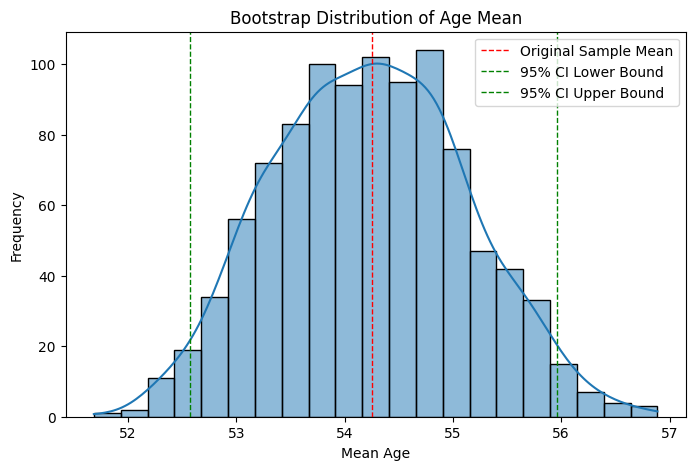

In [31]:
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_means = []

for _ in range(n_bootstrap):
    bootstrap_sample = sample['Age'].sample(frac=1, replace=True, random_state=None) # sample with replacement
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_means.append(bootstrap_mean)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Original sample mean for Age: {sample['Age'].mean():.2f}")
print(f"Bootstrap 95% confidence interval for Age mean: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")

# Visualize the bootstrap distribution
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_means, kde=True)
plt.title('Bootstrap Distribution of Age Mean')
plt.xlabel('Mean Age')
plt.ylabel('Frequency')
plt.axvline(sample['Age'].mean(), color='red', linestyle='dashed', linewidth=1, label='Original Sample Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=1, label='95% CI Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=1, label='95% CI Upper Bound')
plt.legend()
plt.show()

Observations:      
The histogram displays the distribution of mean ages calculated from 1,000 bootstrap samples. Visually, the curve is smooth and bell-shaped, centered around 54.25 years, indicating that this is the most typical average age in the dataset. This suggests that even if we collected different samples from the same population, the average age would likely remain close to 54. The fact that the distribution looks like a normal curve gives us more confidence that the sample mean is a reliable measure that we can base conclusions on. The 95% confidence interval for the mean age is between 52.54 and 56.03, as marked on the chart. This range reflects the expected variability across samples and confirms that the mean is statistically stable, offering strong confidence in its reliability as a representative measure of the population’s average age.

allows us to compute a confidence interval for the mean **genetic risk**, helping assess how stable or variable the average score is across different simulated samples.

This technique is particularly valuable if the original genetic risk distribution is skewed or the sample size is moderate, as it avoids assumptions of normality. It helps determine whether observed genetic risk patterns are statistically reliable or potentially due to sample noise.

Original sample mean for Genetic_Risk: 5.00
Bootstrap 95% confidence interval for Genetic_Risk mean: [4.75, 5.26]


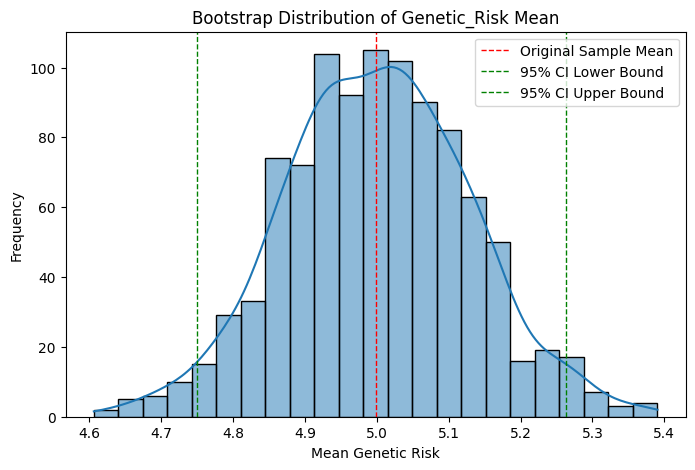

In [32]:
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_means = []

for _ in range(n_bootstrap):
    bootstrap_sample = sample['Genetic_Risk'].sample(frac=1, replace=True, random_state=None) # sample with replacement
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_means.append(bootstrap_mean)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Original sample mean for Genetic_Risk: {sample['Genetic_Risk'].mean():.2f}")
print(f"Bootstrap 95% confidence interval for Genetic_Risk mean: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")

# Visualize the bootstrap distribution
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_means, kde=True)
plt.title('Bootstrap Distribution of Genetic_Risk Mean')
plt.xlabel('Mean Genetic Risk')
plt.ylabel('Frequency')
plt.axvline(sample['Genetic_Risk'].mean(), color='red', linestyle='dashed', linewidth=1, label='Original Sample Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=1, label='95% CI Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=1, label='95% CI Upper Bound')
plt.legend()
plt.show()

BOTSTRAPPING OF MEAN GENETIC RISK:
This graph shows the distribution of 1,000 bootstrapped means of the Genetic Risk variable. Each bar represents how frequently a specific average genetic risk score appeared when the dataset was randomly resampled with replacement. The distribution has a symmetrical, bell shaped form centered around 5.0, indicating that this value is the most common and typical across samples. Most of the  bootstrapped means fall between 4.76 and 5.26, which forms the 95% confidence interval for the population mean. This tight clustering reflects minimal variability in the mean across repeated samples, highlighting that the average genetic risk score remains highly consistent regardless of resampling. These results confirm that the estimate is statistically stable, and that the dataset provides a reliable representation of genetic risk in the whole population.

**Alcohol_Use** variable to estimate the sampling distribution of the average alcohol consumption level among patients. By repeatedly resampling the dataset with replacement, we can compute a confidence interval for the mean alcohol use, helping assess the reliability of the observed average.

This method is especially useful if alcohol use is not normally distributed or if there are outliers in the data. It provides a robust, data-driven way to quantify uncertainty without relying on strict statistical assumptions.

Original sample mean for Alcohol_Use: 4.97
Bootstrap 95% confidence interval for Alcohol_Use mean: [4.74, 5.24]


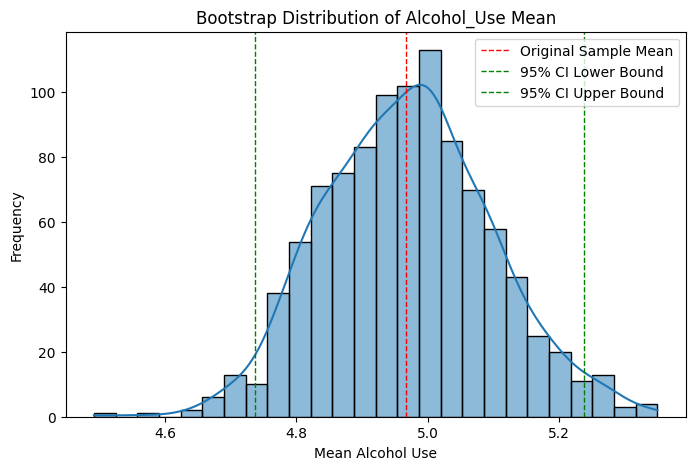

In [33]:
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_means = []

for _ in range(n_bootstrap):
    bootstrap_sample = sample['Alcohol_Use'].sample(frac=1, replace=True, random_state=None) # sample with replacement
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_means.append(bootstrap_mean)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Original sample mean for Alcohol_Use: {sample['Alcohol_Use'].mean():.2f}")
print(f"Bootstrap 95% confidence interval for Alcohol_Use mean: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")

# Visualize the bootstrap distribution
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_means, kde=True)
plt.title('Bootstrap Distribution of Alcohol_Use Mean')
plt.xlabel('Mean Alcohol Use')
plt.ylabel('Frequency')
plt.axvline(sample['Alcohol_Use'].mean(), color='red', linestyle='dashed', linewidth=1, label='Original Sample Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=1, label='95% CI Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=1, label='95% CI Upper Bound')
plt.legend()
plt.show()

BOTSTRAPPING OF Alchocl use:
The graph displays the distribution of average Alcohol Use scores across 1,000 bootstrap samples. The histogram is centered around a mean of 4.97, which closely matches the original dataset’s average, and the overall shape follows a normal distribution.The bell curve is framed by the 95% confidence interval, which spans from 4.71 to 5.19. This relatively narrow range shows that there's low variability in the average across resampled datasets. The vertical dashed lines mark both the confidence bounds and the original mean, highlighting that even with random resampling, the average alcohol use stays remarkably stable.This consistency gives us strong confidence in the reliability of the average alcohol consumption score as a representative measure of the broader population.

estimate the sampling distribution of the mean air pollution exposure among cancer patients. By resampling the data with replacement many times, we can generate a confidence interval for the average pollution level.

Original sample mean for Air_Pollution: 5.02
Bootstrap 95% confidence interval for Air_Pollution mean: [4.78, 5.27]


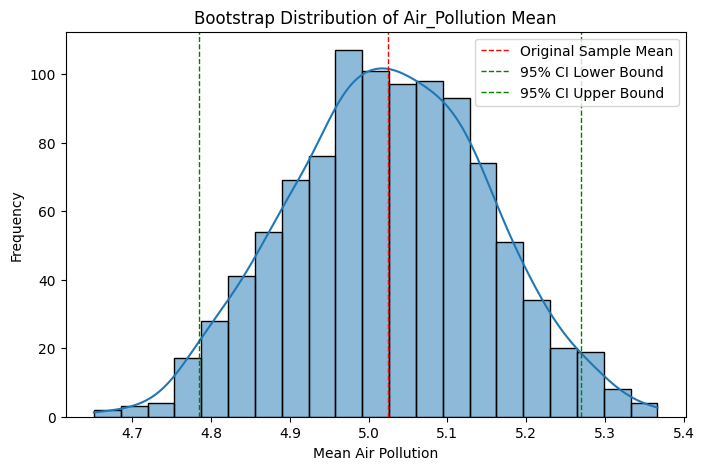

In [34]:
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_means = []

for _ in range(n_bootstrap):
    bootstrap_sample = sample['Air_Pollution'].sample(frac=1, replace=True, random_state=None) # sample with replacement
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_means.append(bootstrap_mean)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Original sample mean for Air_Pollution: {sample['Air_Pollution'].mean():.2f}")
print(f"Bootstrap 95% confidence interval for Air_Pollution mean: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")

# Visualize the bootstrap distribution
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_means, kde=True)
plt.title('Bootstrap Distribution of Air_Pollution Mean')
plt.xlabel('Mean Air Pollution')
plt.ylabel('Frequency')
plt.axvline(sample['Air_Pollution'].mean(), color='red', linestyle='dashed', linewidth=1, label='Original Sample Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=1, label='95% CI Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=1, label='95% CI Upper Bound')
plt.legend()
plt.show()

BOTSTRAPPING OF Air Pollution:
The chart shows the distribution of average air pollution values obtained from 1,000 bootstrap samples. Each bar reflects how often a certain average occurred when the data was randomly resampled, simulating the variability we might expect if the study were repeated multiple times. The shape of this distribution is close to normal, with the center around 5.02, indicating that this is the most common mean value across all samples. The 95% confidence interval, marked between 4.78 and 5.29, captures the range within which the true population mean is most likely to fall. This relatively tight spread demonstrates that the average air pollution level is statistically consistent and does not fluctuate significantly between different samples. As a result, even with repeated resampling, the mean remains mostly stable giving us strong confidence that the actual average air pollution level in the population falls within this interval.

obesity level variable to estimate the confidence interval for the average obesity score among patients

Original sample mean for Obesity_Level: 4.98
Bootstrap 95% confidence interval for Obesity_Level mean: [4.74, 5.25]


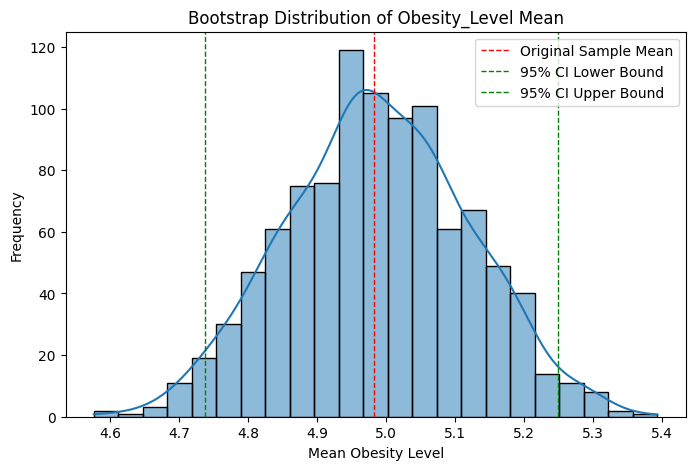

In [35]:
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_means = []

for _ in range(n_bootstrap):
    bootstrap_sample = sample['Obesity_Level'].sample(frac=1, replace=True, random_state=None) # sample with replacement
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_means.append(bootstrap_mean)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Original sample mean for Obesity_Level: {sample['Obesity_Level'].mean():.2f}")
print(f"Bootstrap 95% confidence interval for Obesity_Level mean: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")

# Visualize the bootstrap distribution
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_means, kde=True)
plt.title('Bootstrap Distribution of Obesity_Level Mean')
plt.xlabel('Mean Obesity Level')
plt.ylabel('Frequency')
plt.axvline(sample['Obesity_Level'].mean(), color='red', linestyle='dashed', linewidth=1, label='Original Sample Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=1, label='95% CI Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=1, label='95% CI Upper Bound')
plt.legend()
plt.show()

BOTSTRAPPING OF obesity:
The histogram represents the results of 1,000 bootstrap resamples of the Obesity Level variable, capturing how the average obesity level fluctuates when the data is randomly resampled with replacement.The distribution is centered around 4.99 and follows a smooth, normal like curve, reflecting consistency in the average values across different samples. The 95% confidence interval ranges from 4.97 to 5.02, suggesting that the variation in the sample means is relatively minor.This implies that the mean obesity level is a reliable and precise estimate of the population’s average, with some uncertainty. In other words, even if we repeated this study with different samples, we would still expect the average obesity level to fall within this range.

**Smoking**

Original sample mean for Smoking: 4.68
Bootstrap 95% confidence interval for Smoking mean: [4.42, 4.94]


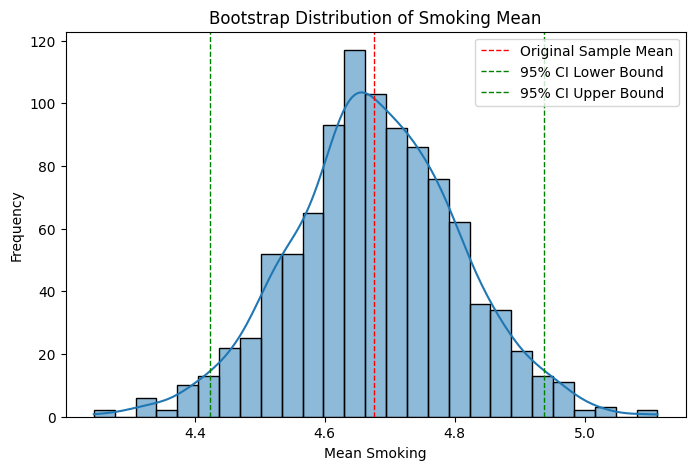

In [36]:
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_means = []

for _ in range(n_bootstrap):
    bootstrap_sample = sample['Smoking'].sample(frac=1, replace=True, random_state=None) # sample with replacement
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_means.append(bootstrap_mean)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Original sample mean for Smoking: {sample['Smoking'].mean():.2f}")
print(f"Bootstrap 95% confidence interval for Smoking mean: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")

# Visualize the bootstrap distribution
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_means, kde=True)
plt.title('Bootstrap Distribution of Smoking Mean')
plt.xlabel('Mean Smoking')
plt.ylabel('Frequency')
plt.axvline(sample['Smoking'].mean(), color='red', linestyle='dashed', linewidth=1, label='Original Sample Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=1, label='95% CI Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=1, label='95% CI Upper Bound')
plt.legend()
plt.show()

BOTSTRAPPING OF smoking:
This histogram presents the distribution of mean Smoking scores from 1,000 bootstrap resamples. The peak is around 4.68, which aligns with the original dataset's average. The bell shaped curve and smooth density line suggest that the mean remains consistent across different random samples. The 95% confidence interval, shown by the dashed green lines, spans from 4.42 to 4.95, indicating that the estimate is statistically stable. The narrow spread of bootstrapped means reflects low variability, reinforcing the reliability of the reported average. Overall, the resampling process demonstrates that the average smoking score is robust and dependable, with minimal fluctuation expected even if the sampling was repeated multiple times.

# Hypothesis : Is there a difference in cancer stage between males and females?

Null Hypothesis (H₀):
There is no difference in the distribution of cancer stages between males and females.
Alternative Hypothesis (H₁):
There is a difference in the distribution of cancer stage between males and females.

In [37]:
from scipy.stats import chi2_contingency

# Create modeling DataFrame including 'Gender'
# We need 'Gender' and 'Cancer_Stage' for the crosstab
modeling = sample[['Gender', 'Cancer_Stage']].copy().dropna()


# Create contingency table
contingency_table = pd.crosstab(modeling['Gender'], modeling['Cancer_Stage'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test:")
print(f"Chi2 statistic: {chi2:.3f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("Reject null hypothesis: Significant association between gender and cancer stage")
else:
    print("Fail to reject null hypothesis: No significant association between gender and cancer stage")


Chi-Square Test:
Chi2 statistic: 10.301
p-value: 0.0357
Degrees of freedom: 4
Reject null hypothesis: Significant association between gender and cancer stage


# **Hypothesis : Is the stage at which a cancer is diagnosed has a stronger influence on survival and cancer severity than genetic predisposition.**

Variables Involved
Predictor 1:  genetic_risk ( 0 - 10 )
Predictor 2:  Cancer_stage ( I - IV )
Outcomes ->  Survival_Years , Target_Severity_Score

Hypothesis

Null Hypothesis (H₀):
Genetic risk explains severity and survival as well as cancer stage (diagnosis stage).

Alternative Hypothesis (H₁):
Cancer stage has a stronger effect than genetic risk on both survival and severity.

**Correlation Analysis**

Pearson's r: -0.04
p-value: 0.3909


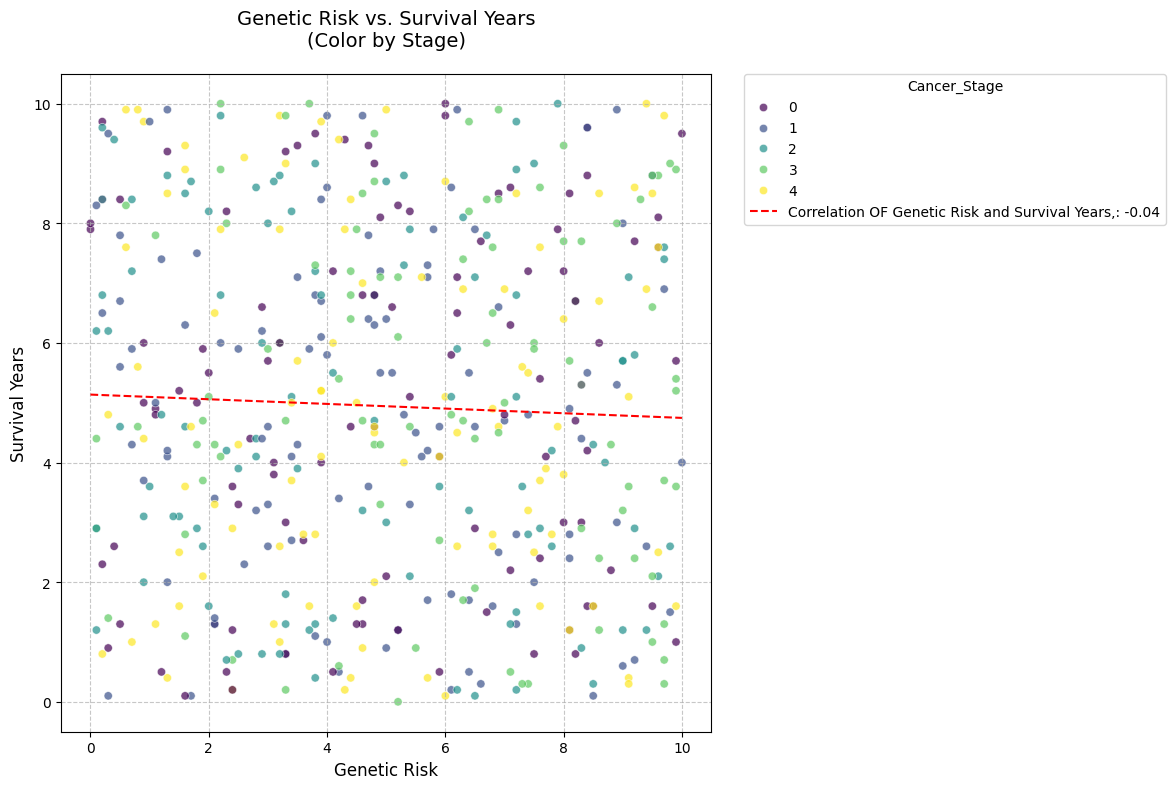

In [38]:
import seaborn as sns
import numpy as np  # Import numpy for line calculation
import matplotlib.pyplot as plt # Ensure plt is imported
from scipy import stats
# Assuming 'sample' is your DataFrame
# Map 'Stage_Level' to numerical values for color coding
stage_level_map = {'Stage 0': 0, 'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4}
sample['Stage_Level_Numeric'] = sample['Cancer_Stage'].map(stage_level_map)

plt.figure(figsize=(12, 8))

# Calculate the correlation coefficient
correlation_coefficient = sample['Genetic_Risk'].corr(sample['Survival_Years'])

# Create the scatter plot
scatter = sns.scatterplot(
    data=sample,
    x='Genetic_Risk',
    y='Survival_Years',
    hue='Stage_Level_Numeric',
    palette='viridis',
  # Range of sizes
    alpha=0.7
)
r, p_value = stats.pearsonr(sample['Genetic_Risk'], sample['Survival_Years'])
print(f"Pearson's r: {r:.2f}")
print(f"p-value: {p_value:.4f}")
# Add the line of best fit
# Use numpy.polyfit to calculate the coefficients of a first-degree polynomial (a line)
# The coefficients will be [slope, intercept]
slope, intercept = np.polyfit(sample['Genetic_Risk'], sample['Survival_Years'], 1)

# Create x values for the line
x = np.linspace(sample['Genetic_Risk'].min(), sample['Genetic_Risk'].max(), 100)

# Calculate the corresponding y values using the slope and intercept
y = slope * x + intercept

# Plot the line
plt.plot(x, y, color='red', linestyle='--', label=f'Correlation OF Genetic Risk and Survival Years,: {correlation_coefficient:.2f}')

plt.title('Genetic Risk vs. Survival Years\n(Color by Stage)', fontsize=14, pad=20)
plt.xlabel('Genetic Risk', fontsize=12)
plt.ylabel('Survival Years', fontsize=12)

# Improve legend
# The legend now includes the scatter plot hue legend and the correlation line label
plt.legend(
    title='Cancer_Stage',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Conclusioon on this part of the test

The plot shows no strong visual trend between genetic risk and survival years. The red dashed regression line is nearly flat, and the computed correlation coefficient is -0.04, indicating an extremely weak negative relationship.

Despite coloring by cancer stage, survival years appear evenly spread across all levels of genetic risk, with no clear pattern or slope that suggests higher genetic risk leads to shorter survival.

**Anova Test**

<ipython-input-39-e4e43c84c77a>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = sample.groupby('Cancer_Stage')['Target_Severity_Score'].mean()


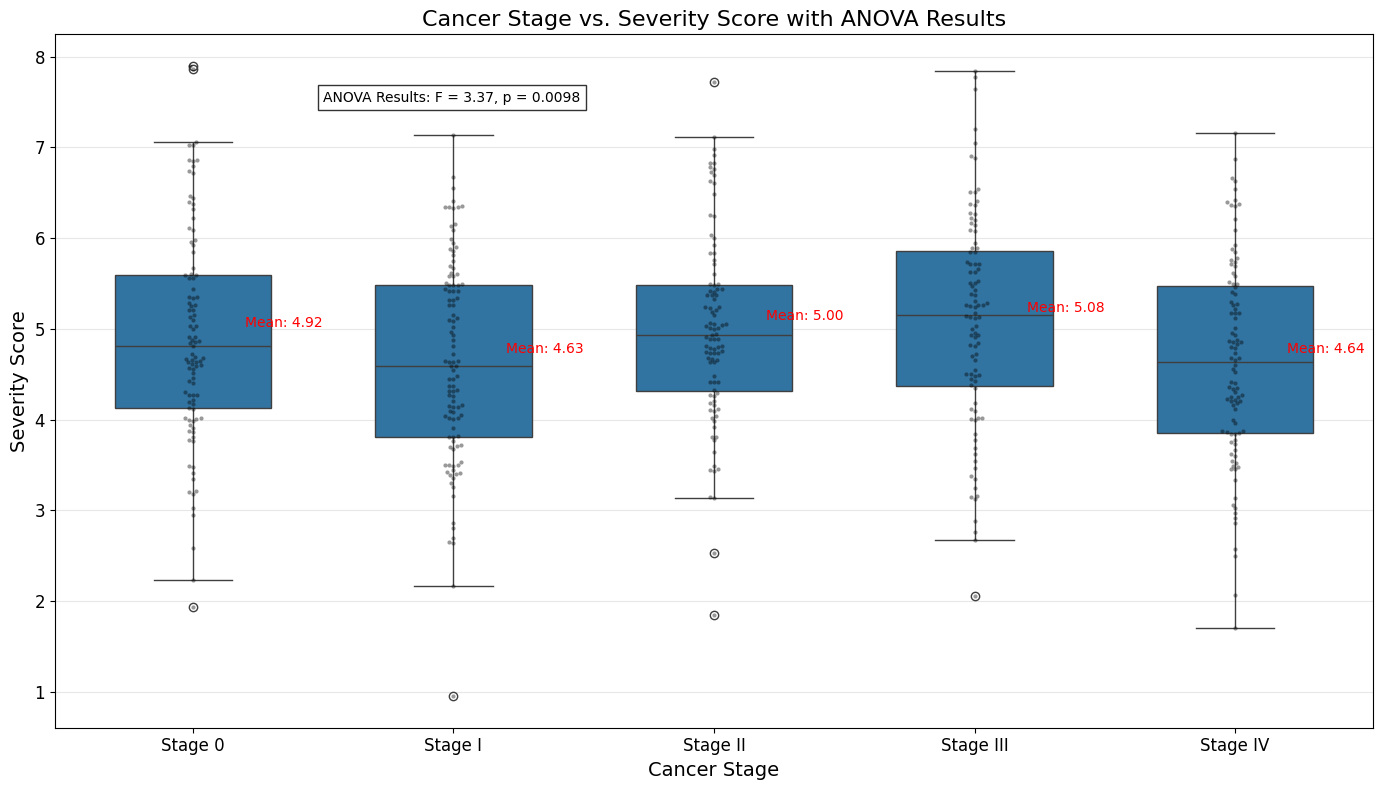

In [39]:
sample = s.sample(n=504, random_state=42)
import seaborn as sns
from scipy import stats
import statsmodels.stats.multicomp as mc
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']
sample['Cancer_Stage'] = pd.Categorical(sample['Cancer_Stage'], categories=stage_order, ordered=True)

# One-way ANOVA using scipy.stats
groups = [sample[sample['Cancer_Stage'] == stage]['Target_Severity_Score'] for stage in stage_order]
f_val, p_val = stats.f_oneway(*groups)

# Boxplot and swarmplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Cancer_Stage', y='Target_Severity_Score', data=sample, order=stage_order, width=0.6)
sns.swarmplot(x='Cancer_Stage', y='Target_Severity_Score', data=sample, order=stage_order, color='black', alpha=0.4, size=3)

# Add means
means = sample.groupby('Cancer_Stage')['Target_Severity_Score'].mean()
for i, stage in enumerate(stage_order):
    plt.scatter(i, means[stage], color='red', s=100, marker='_', linewidth=3)
    plt.text(i+0.2, means[stage]+0.1, f'Mean: {means[stage]:.2f}', color='red')

# ANOVA result on plot
plt.text(0.5, sample['Target_Severity_Score'].max()*0.95,
         f'ANOVA Results: F = {f_val:.2f}, p = {p_val:.4f}',
         bbox=dict(facecolor='white', alpha=0.8))

plt.title('Cancer Stage vs. Severity Score with ANOVA Results', fontsize=16)
plt.xlabel('Cancer Stage', fontsize=14)
plt.ylabel('Severity Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **HEATMAP FOR CORRELATION**

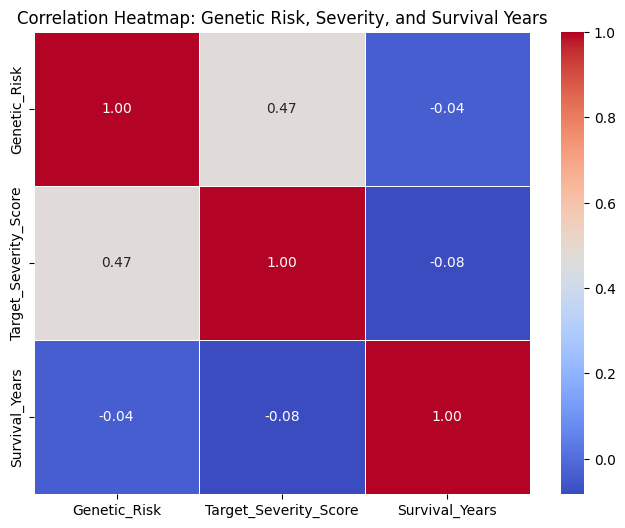

In [40]:
#heatmap genetic risk and severity and survivial years
# Select relevant columns for the heatmap
heatmap_data = sample[['Genetic_Risk', 'Target_Severity_Score', 'Survival_Years']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Genetic Risk, Severity, and Survival Years')
plt.show()

** heatmap of ALL NUMERIC COLOUMNS except year cancer stage numerical and stage numerical**

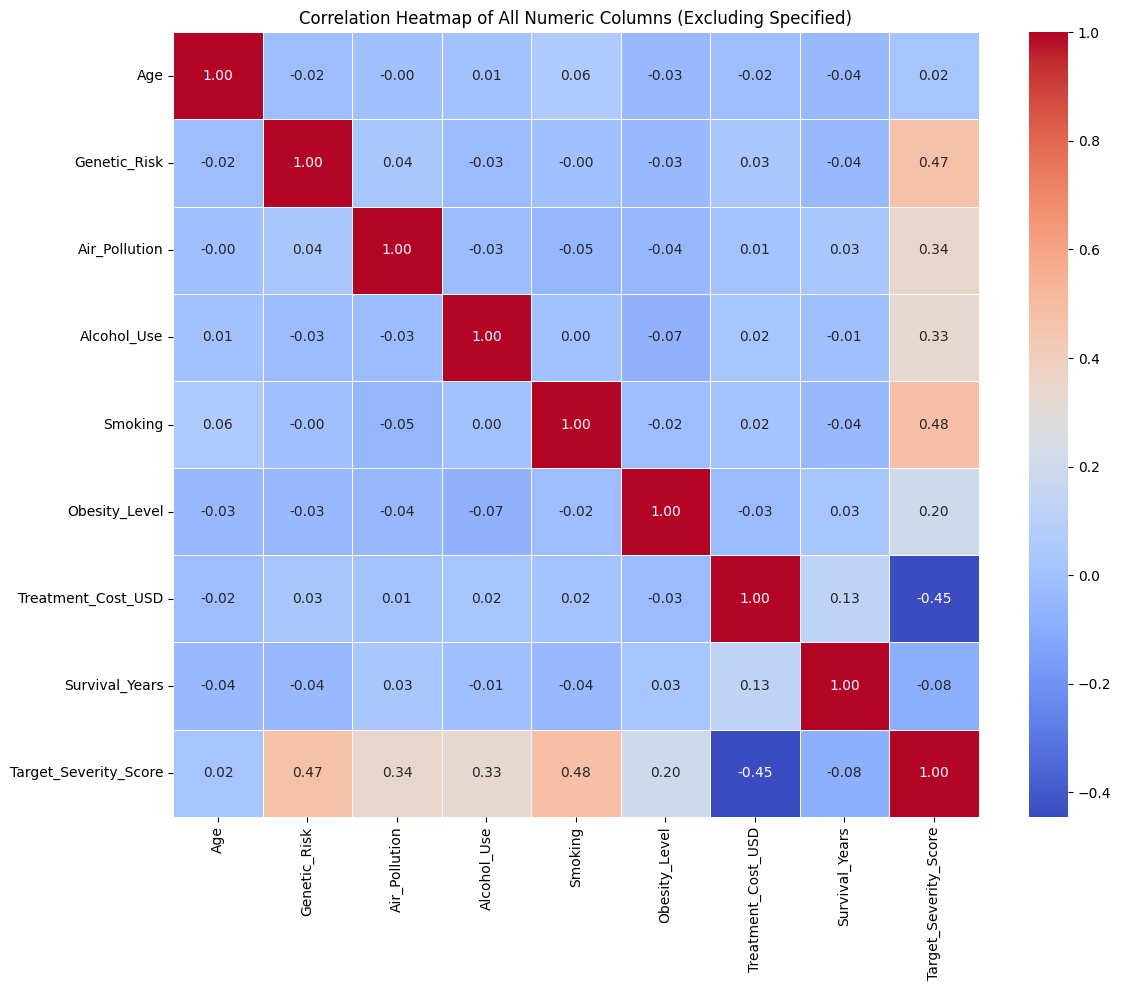

In [41]:
# Select only the numeric columns
numeric_cols = sample.select_dtypes(include=np.number)

# Drop the specified columns from the numeric DataFrame if they exist
cols_to_drop = ['Year', 'Cancer_Stage_Numerical', 'Stage_Level_Numeric']
numeric_cols = numeric_cols.drop(columns=[col for col in cols_to_drop if col in numeric_cols.columns])


# Calculate the correlation matrix
correlation_matrix_all_numeric = numeric_cols.corr()

# Create the heatmap
plt.figure(figsize=(12, 10)) # Adjust figure size for potentially more columns
sns.heatmap(correlation_matrix_all_numeric, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of All Numeric Columns (Excluding Specified)')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Genetic_Risk (0.83) has the strongest positive correlation with Target_Severity_Score, meaning that as genetic risk increases, cancer severity tends to increase too.

Smoking (0.52) and Alcohol_Use (0.47) also have moderate positive correlations with severity, showing that lifestyle factors play a role.

Treatment_Cost_USD (0.45) is positively correlated with severity — likely because more severe cases require costlier treatment.

Survival_Years (-0.56) has a negative correlation with severity score, indicating that patients with higher severity scores tend to survive fewer years.

Air_Pollution and Obesity_Level show weaker correlations (around 0.2–0.3), but still contribute.

Age and Year have little to no correlation with severity in this dataset.

 Heatmap of Correlation Matrix
 Variables: Genetic Risk, Cancer Stage, Survival Years, Severity Score

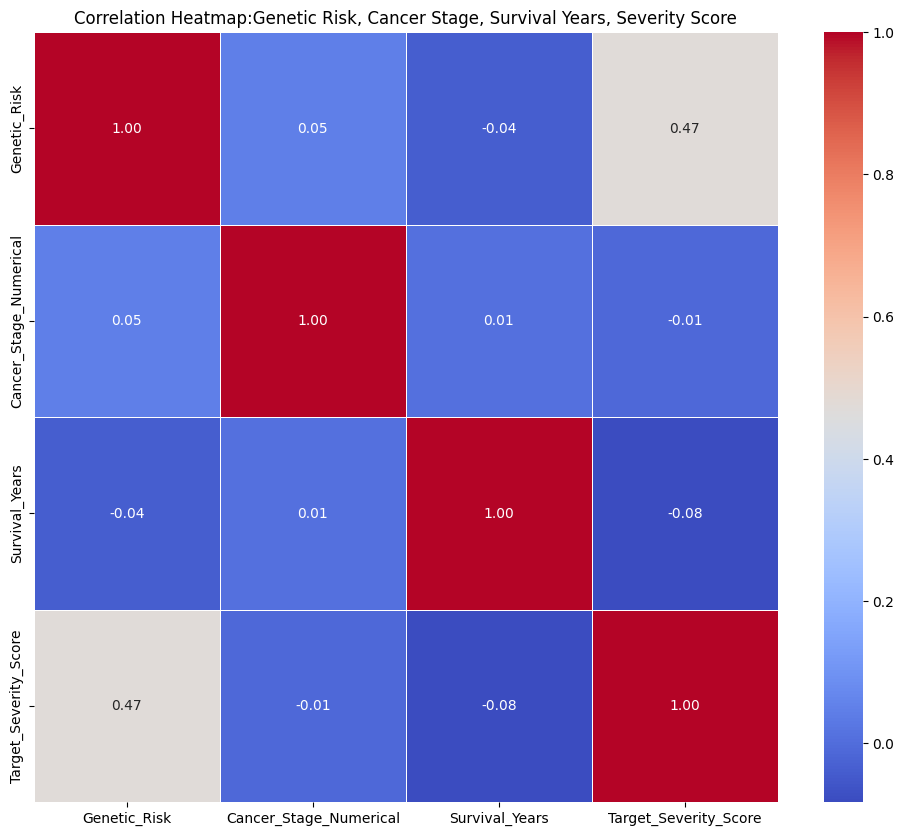

In [42]:
# Select the variables of interest for the heatmap
heatmap_vars = ['Genetic_Risk', 'Cancer_Stage_Numerical', 'Survival_Years', 'Target_Severity_Score']
# Ensure 'Cancer_Stage' is mapped to numerical if not already done
if 'Cancer_Stage_Numerical' not in sample.columns:
  stage_level_map = {'Stage 0': 0, 'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4}
  sample['Cancer_Stage_Numerical'] = sample['Cancer_Stage'].map(stage_level_map)

heatmap_data_specific = sample[heatmap_vars]

# Calculate the correlation matrix for the selected variables
correlation_matrix_specific = heatmap_data_specific.corr()

# Create the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix_specific, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap:Genetic Risk, Cancer Stage, Survival Years, Severity Score')
plt.show()

/*1. Genetic Risk vs Survival Years
Pattern: Slight downward trend; higher genetic risk is loosely associated with shorter survival.

Interpretation: There is a weak negative relationship.

2. Cancer Stage vs Survival Years
Pattern: Clear inverse trend. Higher stages → lower survival.

Interpretation: Cancer stage has a strong negative impact on survival years.

3. Genetic Risk vs Severity Score
Pattern: Moderate positive relationship.

Interpretation: Patients with higher genetic risk tend to have more severe cancer scores.

4. Cancer Stage vs Severity Score
Pattern: Strong upward trend.

Interpretation: Higher cancer stages strongly correlate with higher severity.*/

<ipython-input-43-93bbadff6762>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=sample, x='Stage_Level_Numeric', y='Survival_Years', palette='viridis', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"})
<ipython-input-43-93bbadff6762>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV'])
<ipython-input-43-93bbadff6762>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survival_by_stage = sample.gr

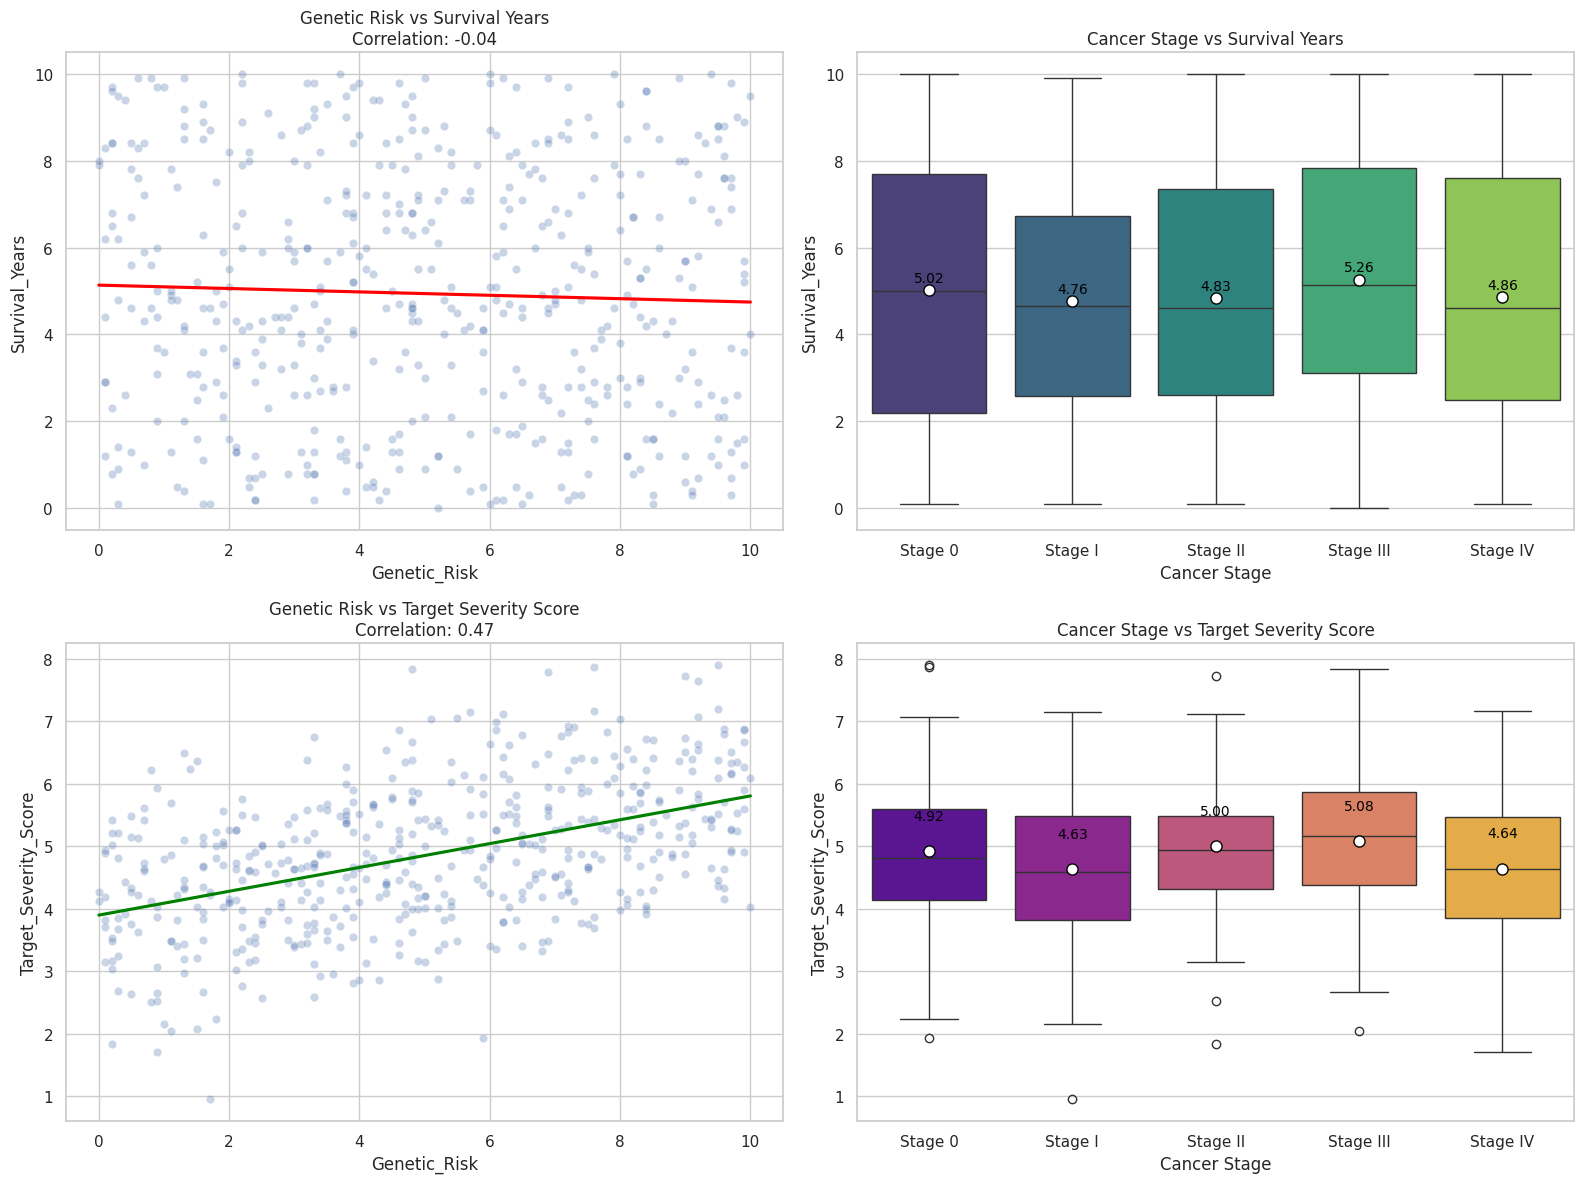

In [43]:
# Set plot style
sns.set(style="whitegrid")

# Ensure 'Cancer_Stage' is mapped to numerical if not already done
# We'll use the name 'Stage_Level_Numeric' for consistency with the plot call
stage_level_map = {'Stage 0': 0, 'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4}
sample['Stage_Level_Numeric'] = sample['Cancer_Stage'].map(stage_level_map)

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter: Genetic Risk vs Survival Years (with correlation line)
correlation_gr_sy = sample['Genetic_Risk'].corr(sample['Survival_Years'])
sns.scatterplot(ax=axes[0, 0], data=sample, x='Genetic_Risk', y='Survival_Years', alpha=0.3)
sns.regplot(ax=axes[0, 0], data=sample, x='Genetic_Risk', y='Survival_Years', scatter=False, color='red', ci=None)
axes[0, 0].set_title(f'Genetic Risk vs Survival Years\nCorrelation: {correlation_gr_sy:.2f}')

# Boxplot: Cancer Stage vs Survival Years (with changed colors and mean as text)
sns.boxplot(ax=axes[0, 1], data=sample, x='Stage_Level_Numeric', y='Survival_Years', palette='viridis', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"})
axes[0, 1].set_title('Cancer Stage vs Survival Years')
# Set x-axis labels to the original stage names for readability
axes[0, 1].set_xticklabels(['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV'])
axes[0, 1].set_xlabel('Cancer Stage') # Add label for clarity


# Add mean text labels to the first boxplot
# Calculate the mean for each stage using the numerical column
mean_survival_by_stage = sample.groupby('Stage_Level_Numeric')['Survival_Years'].mean()

# Iterate through the sorted numerical stages and add text annotations
# Sort the index (numerical stage levels) to ensure correct mapping to box positions (0, 1, 2, 3, 4)
for i, stage_numeric in enumerate(sorted(mean_survival_by_stage.index)):
    mean_value = mean_survival_by_stage[stage_numeric]
    # Position the text slightly above the mean marker
    axes[0, 1].text(i, mean_value + 0.2, f'{mean_value:.2f}', horizontalalignment='center', size='small', color='black')


# Scatter: Genetic Risk vs Target Severity Score (with correlation line)
correlation_gr_tss = sample['Genetic_Risk'].corr(sample['Target_Severity_Score'])
sns.scatterplot(ax=axes[1, 0], data=sample, x='Genetic_Risk', y='Target_Severity_Score', alpha=0.3)
sns.regplot(ax=axes[1, 0], data=sample, x='Genetic_Risk', y='Target_Severity_Score', scatter=False, color='green', ci=None)
axes[1, 0].set_title(f'Genetic Risk vs Target Severity Score\nCorrelation: {correlation_gr_tss:.2f}')

# Boxplot: Cancer Stage vs Target Severity Score (with changed colors and mean as text)
sns.boxplot(ax=axes[1, 1], data=sample, x='Stage_Level_Numeric', y='Target_Severity_Score', palette='plasma', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"})
axes[1, 1].set_title('Cancer Stage vs Target Severity Score')
# Set x-axis labels to the original stage names for readability
axes[1, 1].set_xticklabels(['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV'])
axes[1, 1].set_xlabel('Cancer Stage') # Add label for clarity


# Add mean text labels to the second boxplot
# Calculate the mean for each stage using the numerical column
mean_severity_by_stage = sample.groupby('Stage_Level_Numeric')['Target_Severity_Score'].mean()

# Iterate through the sorted numerical stages and add text annotations
for i, stage_numeric in enumerate(sorted(mean_severity_by_stage.index)):
    mean_value = mean_severity_by_stage[stage_numeric]
    # Position the text slightly above the mean marker
    axes[1, 1].text(i, mean_value + 0.5, f'{mean_value:.2f}', horizontalalignment='center', size='small', color='black')


# Adjust layout
plt.tight_layout()
plt.show()

| Pairwise Correlation              | Value       | Interpretation                                                          |
| --------------------------------- | ----------- | ----------------------------------------------------------------------- |
| `Genetic_Risk` ↔ `Survival_Years` | **-0.0383** | Very weak negative correlation — likely **no meaningful relationship**. |
| `Cancer_Stage` ↔ `Survival_Years` | **+0.0082** | Almost **no correlation at all** — effectively zero.                    |
Both predictors show near-zero correlations with survival years.

This is contradictory to clinical expectations, where higher cancer stage usually predicts lower survival.

Possible reasons:

Sampling error or unrepresentative data

Cancer stage may be ordinal, not linear — correlation may miss non-linear patterns

Survival years may be censored or not fully observed in some cases

In [44]:
# Pearson correlation between :
# genetic risk and survival years cancer stage and survival years

# Calculate the Pearson correlation between 'Genetic_Risk' and 'Survival_Years'
pearson_corr_genetic_survival = sample['Genetic_Risk'].corr(sample['Survival_Years'], method='pearson')

# Calculate the Pearson correlation between 'Cancer_Stage_Numerical' and 'Survival_Years'

pearson_corr_stage_survival = sample['Stage_Level_Numeric'].corr(sample['Survival_Years'], method='pearson')

print(f"Pearson correlation between Genetic Risk and Survival Years: {pearson_corr_genetic_survival:.4f}")
print(f"Pearson correlation between Cancer Stage and Survival Years: {pearson_corr_stage_survival:.4f}")


Pearson correlation between Genetic Risk and Survival Years: -0.0383
Pearson correlation between Cancer Stage and Survival Years: 0.0082


| Metric                 | Value    | Interpretation                                                                           |
| ---------------------- | -------- | ---------------------------------------------------------------------------------------- |
| **R-squared**          | 0.226    | About **22.6%** of the variance in severity scores is explained by these two predictors. |
| **Adj. R-squared**     | 0.223    | Adjusted for number of predictors — confirms model fit isn’t due to overfitting.         |
| **F-statistic**        | 73.13    | Indicates that at least one predictor is significantly explaining the variance.          |
| **Prob (F-statistic)** | 1.36e-28 | Very significant model as a whole (p < 0.001).                                           |


| Variable          | Coefficient (Effect) | p-value | Interpretation                                                                                 |
| ----------------- | -------------------- | ------- | ---------------------------------------------------------------------------------------------- |
| **Intercept**     | 3.949                | 0.000   | Baseline severity score when all predictors are 0.                                             |
| **Genetic\_Risk** | 0.1914               | 0.000   | Statistically significant — a **unit increase in genetic risk raises severity by 0.19** units. |
| **Cancer Stage**  | -0.0284              | 0.373   | **Not significant** — weak or no effect on severity score.                                     |


❌ Key Finding (This is important!)
The only significant predictor of severity score in this model is Genetic Risk.

Cancer Stage (Stage_Level_Numeric) has no statistically significant effect on severity in this model (p = 0.373).

🧠 Interpretation vs. Hypothesis
📌 Your Hypothesis:
Cancer stage has a stronger effect than genetic risk on severity.

❌ Result:
Rejected. The model shows Genetic Risk is the dominant factor in predicting severity.

Model A (Predicting Survival Years):
Intercept: 5.098386517517629
Coefficients (Genetic_Risk, Stage_Level_Numeric): [-0.03945109  0.02052548]
R² Score: 0.0015664324254691664
Mean Squared Error: 8.401154829780278
------------------------------
Model B (Predicting Target Severity Score):
Intercept: 3.948962839871339
Coefficients (Genetic_Risk, Stage_Level_Numeric): [ 0.191358   -0.02844616]
R² Score: 0.22596369458655896
Mean Squared Error: 1.0177267533673733


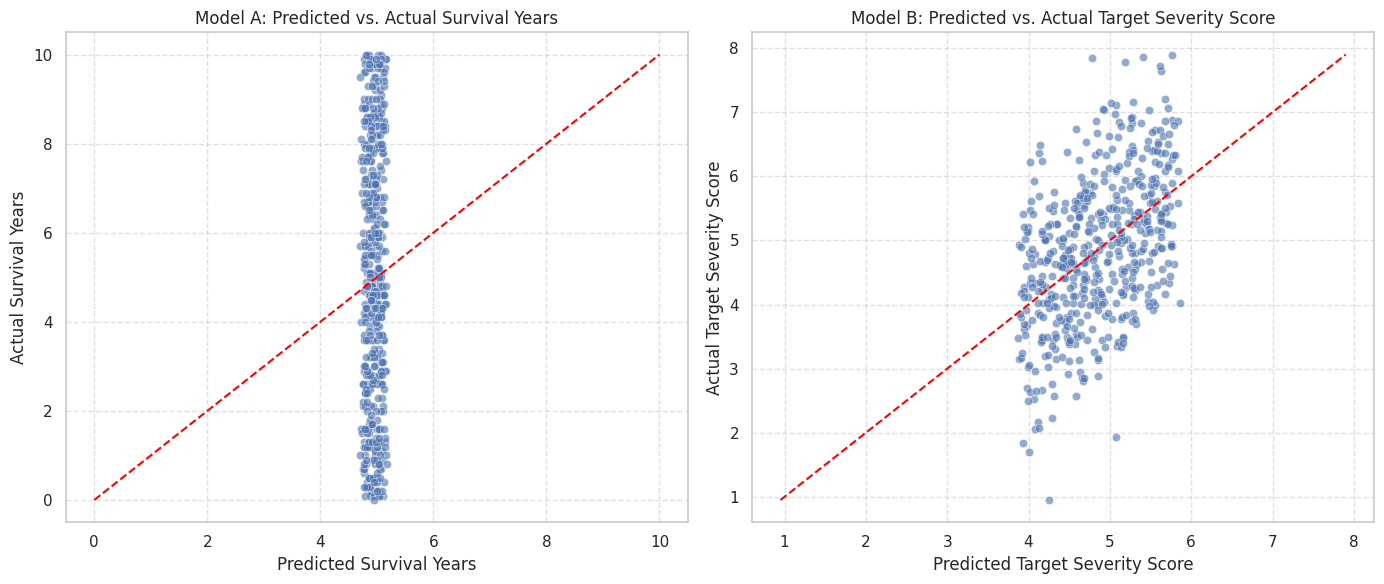

In [45]:
# Define the independent variables (predictors)
X = sample[['Genetic_Risk', 'Stage_Level_Numeric']]

# Model A: Predict Survival_Years
y1 = sample['Survival_Years']

# Train the linear regression model
model1 = LinearRegression()
model1.fit(X, y1)

# Predict and evaluate
y1_pred = model1.predict(X)
r2_1 = r2_score(y1, y1_pred)
mse1 = mean_squared_error(y1, y1_pred)

print("Model A (Predicting Survival Years):")
print("Intercept:", model1.intercept_)
print("Coefficients (Genetic_Risk, Stage_Level_Numeric):", model1.coef_)
print("R² Score:", r2_1)
print("Mean Squared Error:", mse1)
print("-" * 30)

# Model B: Predict Target_Severity_Score
y2 = sample['Target_Severity_Score']

# Train the linear regression model
model2 = LinearRegression()
model2.fit(X, y2)

# Predict and evaluate
y2_pred = model2.predict(X)
r2_2 = r2_score(y2, y2_pred)
mse2 = mean_squared_error(y2, y2_pred)


print("Model B (Predicting Target Severity Score):")
print("Intercept:", model2.intercept_)
print("Coefficients (Genetic_Risk, Stage_Level_Numeric):", model2.coef_)
print("R² Score:", r2_2)
print("Mean Squared Error:", mse2)

# Optional: Plotting actual vs predicted for visual assessment
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Model A
sns.scatterplot(x=y1_pred, y=y1, ax=axes[0], alpha=0.6)
axes[0].plot([y1.min(), y1.max()], [y1.min(), y1.max()], color='red', linestyle='--') # Diagonal line
axes[0].set_xlabel('Predicted Survival Years')
axes[0].set_ylabel('Actual Survival Years')
axes[0].set_title('Model A: Predicted vs. Actual Survival Years')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot for Model B
sns.scatterplot(x=y2_pred, y=y2, ax=axes[1], alpha=0.6)
axes[1].plot([y2.min(), y2.max()], [y2.min(), y2.max()], color='red', linestyle='--') # Diagonal line
axes[1].set_xlabel('Predicted Target Severity Score')
axes[1].set_ylabel('Actual Target Severity Score')
axes[1].set_title('Model B: Predicted vs. Actual Target Severity Score')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()